In [25]:
import gdown
url= 'https://drive.google.com/file/d/1HZcEAbfRQQSgfMB_SEx3Q3vqkqxzcjk-/view?usp=drive_link'
output= 'Camioneta furgon Iveco Daily.json'
gdown.download(url, output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1HZcEAbfRQQSgfMB_SEx3Q3vqkqxzcjk-
To: /content/Camioneta furgon Iveco Daily.json
100%|██████████| 2.25M/2.25M [00:00<00:00, 149MB/s]


'Camioneta furgon Iveco Daily.json'

In [26]:
import pandas as pd
import json

# Load the JSON file
with open('Camioneta furgon Iveco Daily.json', 'r') as f:
    data = json.load(f)

# Normalize the 'gral' section of the data (adjust 'gral' if it's a different key)
df_gral = pd.json_normalize(data['gral'])


# Imprimo mi data set
print(df_gral.head())
print(df_gral.info())

   object                      from                        to mins velmax  \
0    3943  2024-06-08T03:00:00.000Z  2024-06-16T01:25:02.905Z    0     92   

  type dvcType    _v objType                              hash  kmRec  \
0  can     BCE  next      18  903fca6541a0c5c728fe263109714425  118.5   

   engOnSec  motionTime  canKmRec  canConsL  canL100Km  
0     56548       16402       120        23       19.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   object      1 non-null      int64  
 1   from        1 non-null      object 
 2   to          1 non-null      object 
 3   mins        1 non-null      object 
 4   velmax      1 non-null      object 
 5   type        1 non-null      object 
 6   dvcType     1 non-null      object 
 7   _v          1 non-null      object 
 8   objType     1 non-null      object 
 9   hash        1 non-null     

In [27]:
# Normalize the 'trips' section of the data (adjust 'gral' if it's a different key)
df_trips = pd.json_normalize(data['trips'])
df_trips.head()
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            62 non-null     object 
 1   start           62 non-null     int64  
 2   end             62 non-null     int64  
 3   events          32 non-null     object 
 4   from.lat        31 non-null     float64
 5   from.lng        31 non-null     float64
 6   to.lat          31 non-null     float64
 7   to.lng          31 non-null     float64
 8   lat             31 non-null     float64
 9   lng             31 non-null     float64
 10  idleTime        31 non-null     float64
 11  fuelEnd         30 non-null     object 
 12  status          31 non-null     object 
 13  dir             31 non-null     object 
 14  kmRec           30 non-null     float64
 15  engOnSec        30 non-null     float64
 16  motionTime      30 non-null     float64
 17  canKmRec        30 non-null     float

In [28]:
# Normalize the 'details' section of the data (adjust 'gral' if it's a different key)
df_details = pd.json_normalize(data['details'])
df_details.head()
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1858 non-null   int64  
 1   bat          1858 non-null   float64
 2   km           1858 non-null   float64
 3   engOn        1858 non-null   bool   
 4   evDesc       1858 non-null   object 
 5   dir          1858 non-null   object 
 6   lat          1857 non-null   float64
 7   lng          1857 non-null   float64
 8   speed        1857 non-null   float64
 9   heading      1857 non-null   float64
 10  wheel_speed  1619 non-null   float64
 11  total_fuel   1619 non-null   float64
 12  can_fls      1619 non-null   float64
 13  can_taho     1619 non-null   float64
 14  can_mileage  1619 non-null   float64
 15  eng_temp     1619 non-null   float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 219.7+ KB


In [29]:
df_details.describe()
df_details.isna().sum()
dffinal= df_details.dropna()
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1619 entries, 5 to 1855
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1619 non-null   int64  
 1   bat          1619 non-null   float64
 2   km           1619 non-null   float64
 3   engOn        1619 non-null   bool   
 4   evDesc       1619 non-null   object 
 5   dir          1619 non-null   object 
 6   lat          1619 non-null   float64
 7   lng          1619 non-null   float64
 8   speed        1619 non-null   float64
 9   heading      1619 non-null   float64
 10  wheel_speed  1619 non-null   float64
 11  total_fuel   1619 non-null   float64
 12  can_fls      1619 non-null   float64
 13  can_taho     1619 non-null   float64
 14  can_mileage  1619 non-null   float64
 15  eng_temp     1619 non-null   float64
dtypes: bool(1), float64(12), int64(1), object(2)
memory usage: 204.0+ KB


In [30]:
#ver las correlaciones en mi df
# Calcular las correlaciones con algunas columnas seleccionadas
correlation_matrix = dffinal[['km', 'speed', 'total_fuel','wheel_speed','can_taho']].corr()

# Print the correlation matrix
print(correlation_matrix)



                   km     speed  total_fuel  wheel_speed  can_taho
km           1.000000 -0.005945    0.999122    -0.033750 -0.086710
speed       -0.005945  1.000000   -0.003360     0.920625  0.503919
total_fuel   0.999122 -0.003360    1.000000    -0.030699 -0.083808
wheel_speed -0.033750  0.920625   -0.030699     1.000000  0.717962
can_taho    -0.086710  0.503919   -0.083808     0.717962  1.000000


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [48]:
features = ['km', 'speed', 'wheel_speed', 'can_taho']
target = 'total_fuel'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dffinal[features], dffinal[target], test_size=0.2, random_state=42)


# Create Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Create Support Vector Machine model
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lin = lin_reg.predict(X_test)
y_pred_svr = svr.predict(X_test)

#Print the results
print("Linear Regression:")
print(f"Predicted fuel consumption: {y_pred_lin}")
print("Actual fuel consumption:", y_test.tolist())

print("\nSupport Vector Machine:")
print(f"Predicted fuel consumption: {y_pred_svr}")
print("Actual fuel consumption:", y_test.tolist())

Linear Regression:
Predicted fuel consumption: [8330.21729422 8335.16730349 8351.17367501 8336.32866581 8347.47477309
 8345.27883718 8351.50284662 8339.8501838  8341.26846754 8331.85493173
 8337.01438006 8340.25107957 8337.93337859 8328.93976178 8336.13383591
 8339.08129458 8334.30872534 8331.76085892 8339.89402075 8332.29123419
 8332.47850035 8331.4036511  8331.45868493 8334.50229927 8348.19378657
 8333.73067649 8345.1581057  8335.1800407  8329.54168746 8351.13966982
 8339.66754116 8332.59622344 8338.7933875  8336.18962653 8329.03731024
 8330.12594112 8348.59897131 8350.8855463  8343.70445802 8334.72281125
 8334.82255748 8338.43669803 8340.12487843 8335.23490471 8351.08143002
 8345.27181731 8341.02548517 8350.00057766 8328.96751407 8332.00865848
 8329.05677837 8347.49064736 8334.2647472  8342.20635782 8349.39362085
 8335.44796009 8329.43364287 8343.61839547 8346.11578703 8349.7320496
 8336.84697826 8330.58848393 8335.9073824  8348.33292919 8338.25820278
 8337.80513775 8342.4910682  83

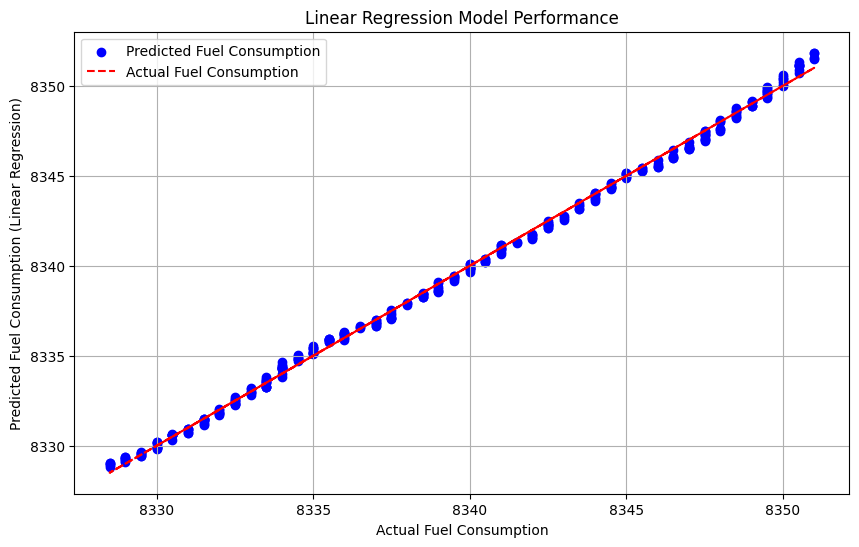

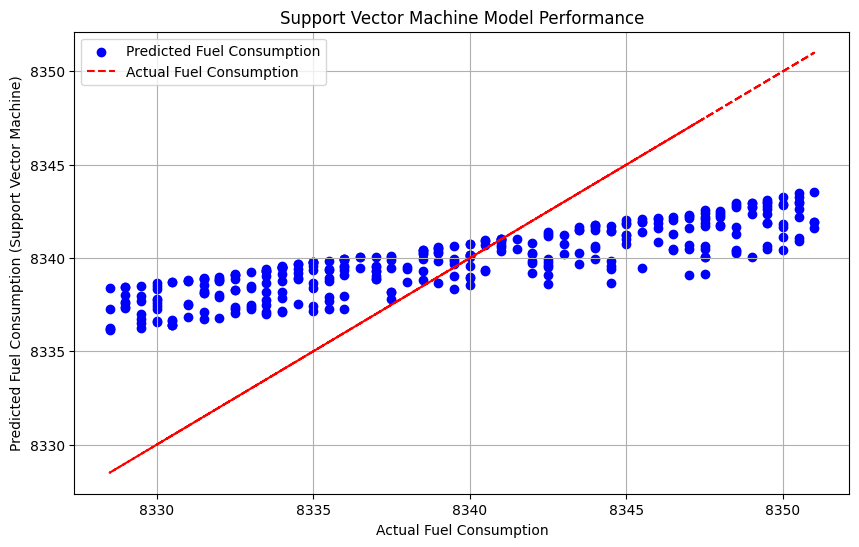

In [47]:
# Plot actual vs predicted fuel consumption for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Linear Regression)')
plt.title('Linear Regression Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted fuel consumption for support vector machine
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted Fuel Consumption')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual Fuel Consumption')
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption (Support Vector Machine)')
plt.title('Support Vector Machine Model Performance')
plt.legend()
plt.grid(True)
plt.show()

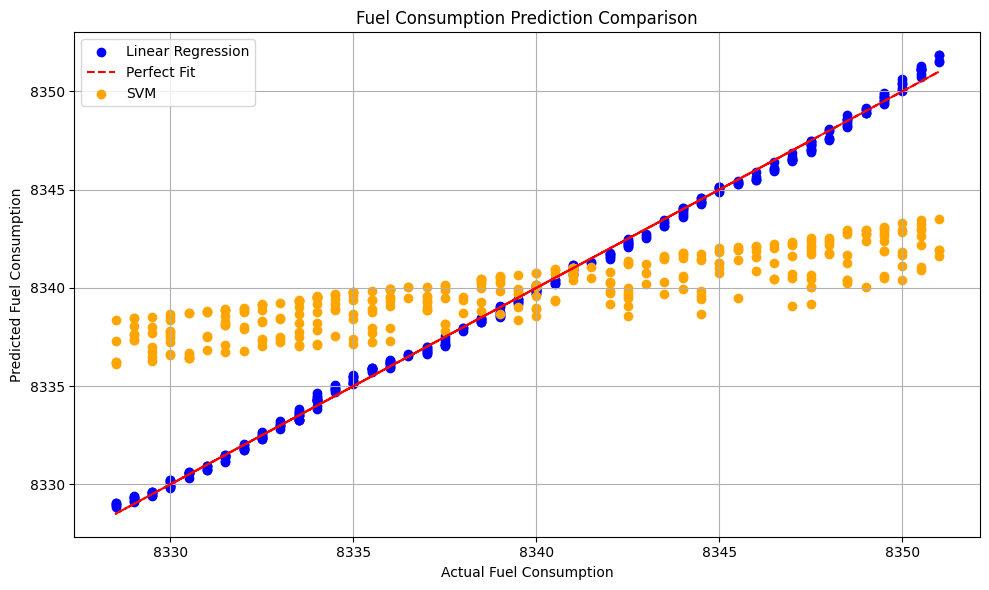

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#Creacion de un grafico de dispersion acerca del consumo real vs la prediccion
y_true = y_test  # Actual consumo de combustible
y_pred_linear = lin_reg.predict(X_test)
y_pred_svm = y_pred_svr



# Create the plot
plt.figure(figsize=(10, 6))

# Plot linear regression results
plt.scatter(y_true, y_pred_linear, label='Linear Regression', color='blue')
plt.plot(y_true, y_true, linestyle='--', color='red', label='Perfect Fit')  # Add a reference line for perfect fit

# Plot SVM results
plt.scatter(y_true, y_pred_svm, label='SVM', color='orange')

# Set labels and title
plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Fuel Consumption Prediction Comparison')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(dffinal[features], dffinal[target], test_size=0.3, random_state=42)

# Handle missing values (example: imputing with mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


# Train your linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = model.predict(X_test)

try:
  # Calculate metrics
  mse_linear = mean_squared_error(y_test, y_pred_linear)
  mae_linear = mean_absolute_error(y_test, y_pred_linear)
  r2_linear = r2_score(y_test, y_pred_linear)

  print("MSE:", mse_linear)
  print("MAE:", mae_linear)
  print("R2:", r2_linear)
except ValueError as e:
  print("Error:", e)



MSE: 0.08302004975191997
MAE: 0.23223249118094783
R2: 0.9981675602557356
